<a href="https://colab.research.google.com/github/payasvi/dl/blob/master/DL_TEST_1_J2_15_JANUARY_J037.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. MNIST
2. Fashion MNIST
3. CIFAR10
4. CIFAR 100
5. IRIS

In [0]:
import keras

Using TensorFlow backend.


In [0]:
from keras.datasets import mnist
from keras.datasets import fashion_mnist
from keras.datasets import cifar10
from keras.datasets import cifar100


In [0]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [0]:
from keras import optimizers
import keras
from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
adamax=keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999)

NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10


(X_train, y_train), (X_test, y_test) = mnist.load_data()


X_train = X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))
X_test = X_test.astype('float32') / 255


y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)


model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.compile(optimizer=adamax,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

11493376/11490434 [==============================] - 0s 0us/step





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 7s 121us/step - loss: 0.2433 - acc: 0.9299 - val_loss: 0.1186 - val_acc: 0.9634
Epoch 2/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.0996 - acc: 0.9703 - val_loss: 0.0896 - val_acc: 0.9718
Epoch 3/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.0654 - acc: 0.9807 - val_loss: 0.0744 - val_acc: 0.9767
Epoch 4/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.0448 - acc: 0.9868 - val_loss: 0.0744 - val_acc: 0.9771
Epoch 5/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.0322 - acc: 0.9902 - val_loss: 0.0752 - val_acc: 0.9769
Epoch 6/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.0230 -

In [0]:
history = model.fit(X_train, y_train, batch_size=128, nb_epoch=10, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 1664/60000 [..............................] - ETA: 6s - loss: 0.0066 - acc: 0.9982

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 7s 116us/step - loss: 0.0052 - acc: 0.9987 - val_loss: 0.0629 - val_acc: 0.9825
Epoch 2/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.0028 - acc: 0.9996 - val_loss: 0.0598 - val_acc: 0.9841
Epoch 3/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.0026 - acc: 0.9996 - val_loss: 0.0749 - val_acc: 0.9809
Epoch 4/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.0019 - acc: 0.9997 - val_loss: 0.0636 - val_acc: 0.9839
Epoch 5/10
60000/60000 [==============================] - 7s 113us/step - loss: 0.0010 - acc: 0.9999 - val_loss: 0.0669 - val_acc: 0.9843
Epoch 6/10
60000/60000 [==============================] - 7s 112us/step - loss: 8.0241e-04 - acc: 1.0000 - val_loss: 0.0653 - val_acc: 0.9835
Epoch 7/10
60000/60000 [==============================] - 7s 113us/step - loss: 0.0012 - acc: 0.9998 - val_loss: 0.0729 - val_acc: 0.9825
Epoch 8/10
60000/60000 [=================

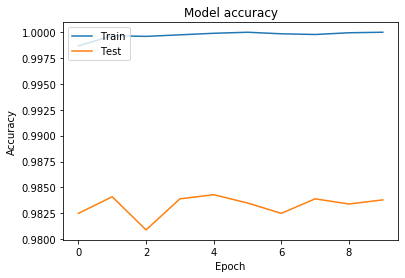

In [0]:
from matplotlib import pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

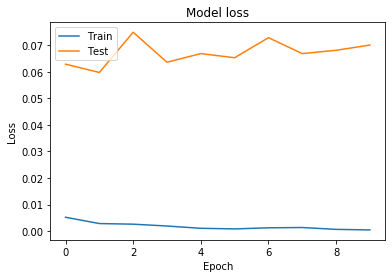

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


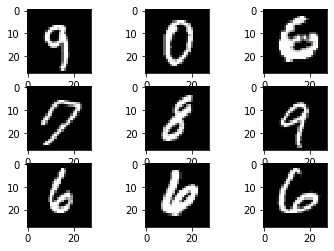

In [0]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import os
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator()
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
os.makedirs('images')
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir='images', save_prefix='aug', save_format='png'):
  # create a grid of 3x3 images
  for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
  # show the plot
  pyplot.show()
  break



In [0]:
NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10

# Load data
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

# Reshape data
X_train = X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))
X_test = X_test.astype('float32') / 255

# Categorically encode labels
Y_train = to_categorical(Y_train, NUM_CLASSES)
Y_test = to_categorical(Y_test, NUM_CLASSES)


# Build neural network
model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

from keras import optimizers
adamax=keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999)

# Compile model using above optimizer
model.compile(optimizer=adamax,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4423680/4422102 [==============================] - 1s 0us/step
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.4999 - acc: 0.8222 - val_loss: 0.4163 - val_acc: 0.8497
Epoch 2/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.3676 - acc: 0.8676 - val_loss: 0.4090 - val_acc: 0.8501
Epoch 3/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.3285 - acc: 0.8804 - val_loss: 0.3747 - val_acc: 0.8608
Epoch 4/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.3006 - acc: 0.8895 - val_loss: 0.3541 - val_acc: 0.8708
Epoch 5/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.2820 - acc: 0.8960 - val_loss: 0.3374 - val_acc: 0.8723
Epoch 6/10
60000/60000 [==============================] - 7s 113us/step - loss: 0.2668 - acc: 0.9009 - val_loss: 0.3314 - val_acc: 0.8817
Epoch 7/10
60000/60000 [==============================] - 7

In [0]:
from keras.layers import Activation
#import dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

#change shape from image to vector
X_train = X_train.reshape(50000, 32 * 32 * 3)
X_test = X_test.reshape(10000, 32 * 32 * 3)

#preprocess
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

#change labels from numeric to one hot encoded
Y_train = to_categorical(Y_train, 10)
Y_test =  to_categorical(Y_test, 10)

#Model building
model = models.Sequential()
model.add(Dense(1024, input_shape=(3072, )))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))


from keras import optimizers
adamax=keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999)

# Compile model using above optimizer
model.compile(optimizer=adamax,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

170500096/170498071 [==============================] - 2s 0us/step
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 34s 688us/step - loss: 2.0630 - acc: 0.2955 - val_loss: 1.7795 - val_acc: 0.3489
Epoch 2/10
50000/50000 [==============================] - 35s 692us/step - loss: 1.6892 - acc: 0.3960 - val_loss: 1.6617 - val_acc: 0.3961
Epoch 3/10
50000/50000 [==============================] - 34s 675us/step - loss: 1.5917 - acc: 0.4302 - val_loss: 1.5902 - val_acc: 0.4418
Epoch 4/10
50000/50000 [==============================] - 34s 674us/step - loss: 1.5285 - acc: 0.4538 - val_loss: 1.5394 - val_acc: 0.4482
Epoch 5/10
50000/50000 [==============================] - 34s 687us/step - loss: 1.4733 - acc: 0.4747 - val_loss: 1.5313 - val_acc: 0.4642
Epoch 6/10
50000/50000 [==============================] - 34s 676us/step - loss: 1.4354 - acc: 0.4886 - val_loss: 1.4663 - val_acc: 0.4791
Epoch 7/10
50000/50000 [=========================

In [0]:
from keras import optimizers
rms=keras.optimizers.RMSprop(lr=0.001, rho=0.9)

# Compile model using above optimizer
model.compile(optimizer=rms,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

ValueError: ignored

In [0]:

ada=keras.optimizers.Adagrad(lr=0.01)

# Compile model using above optimizer
model.compile(optimizer=ada,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [0]:

adelta=keras.optimizers.Adadelta(lr=1.0, rho=0.95)

# Compile model using above optimizer
model.compile(optimizer=adelta,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [0]:

adam=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

# Compile model using above optimizer
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [0]:

nadam=keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999)


# Compile model using above optimizer
model.compile(optimizer=nadam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

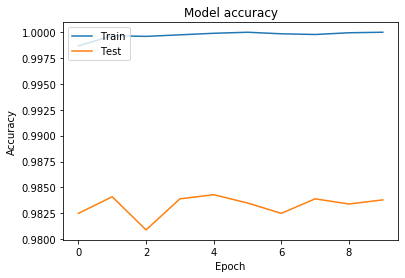

In [0]:


plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



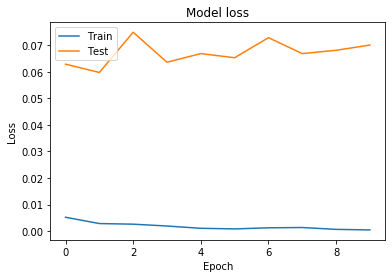

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


